In [ ]:
# Importing the libraryes
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# path to the
train_dir = "drive/MyDrive/Covid19-dataset/train"
test_dir = "drive/MyDrive/Covid19-dataset/test"

In [ ]:
#image argumentation
train_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    shear_range=0.2,
    zoom_range=0.2

)

In [ ]:
test_generator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
width, height =512,512
batch_size=32

In [ ]:
x_train = train_generator.flow_from_directory(
    train_dir,
    target_size=(width,height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [ ]:
x_test = train_generator.flow_from_directory(
    test_dir,
    target_size=(width,height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 66 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(width,height,3)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(3,activation="softmax")

])

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,epochs=30,batch_size=batch_size,validation_data=x_test)

Epoch 1/30
8/8 [==============================] - 255s 31s/step - loss: 222.8948 - accuracy: 0.3944 - val_loss: 2.2141 - val_accuracy: 0.5303
Epoch 2/30
8/8 [==============================] - 27s 4s/step - loss: 0.9537 - accuracy: 0.6932 - val_loss: 0.9130 - val_accuracy: 0.7424
Epoch 3/30
8/8 [==============================] - 27s 3s/step - loss: 0.7956 - accuracy: 0.6853 - val_loss: 0.9463 - val_accuracy: 0.7273
Epoch 4/30
8/8 [==============================] - 27s 4s/step - loss: 0.7103 - accuracy: 0.6853 - val_loss: 0.7793 - val_accuracy: 0.6970
Epoch 5/30
8/8 [==============================] - 27s 3s/step - loss: 0.5684 - accuracy: 0.7769 - val_loss: 0.8079 - val_accuracy: 0.7273
Epoch 6/30
8/8 [==============================] - 27s 4s/step - loss: 0.5089 - accuracy: 0.8127 - val_loss: 0.9587 - val_accuracy: 0.6061
Epoch 7/30
8/8 [==============================] - 27s 3s/step - loss: 0.5981 - accuracy: 0.7729 - val_loss: 0.4664 - val_accuracy: 0.8182
Epoch 8/30
8/8 [==============

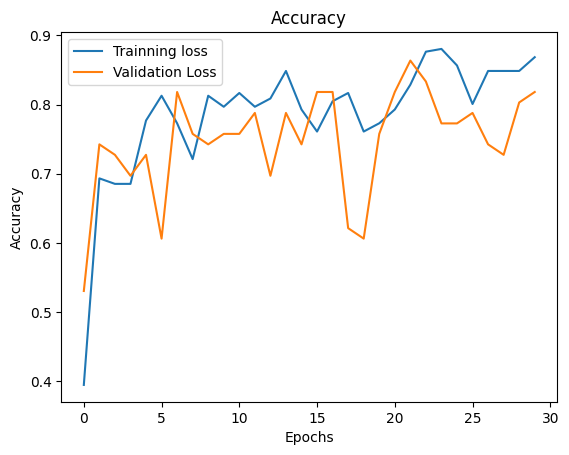

In [ ]:
plt.plot(history.history["accuracy"],label="Trainning loss")
plt.plot(history.history["val_accuracy"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

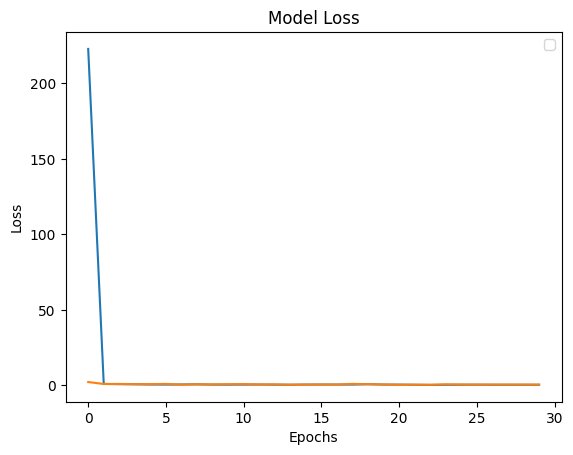

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

In [ ]:
class_name = x_test.class_indices
classes = {value:key for key, value in class_name.items()}
print("Class Names",classes)

Class Names {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img("0111.jpg",target_size=(width,height))

In [ ]:
img_arr = image.img_to_array(img)

In [ ]:
img_arr = np.expand_dims(img_arr,axis=0)

In [ ]:
img_arr = img_arr/255.

In [ ]:
pred = model.predict(img_arr)

1/1 [==============================] - 0s 20ms/step


In [ ]:
pred_class= np.argmax(pred)

In [ ]:
print(pred_class)

0
